In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import seaborn as sns # for data visualization

In [92]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [93]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [94]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [95]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [97]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [98]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [99]:
# description of data
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [100]:
# name of features
print(breast_cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [101]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [102]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

<Axes: >

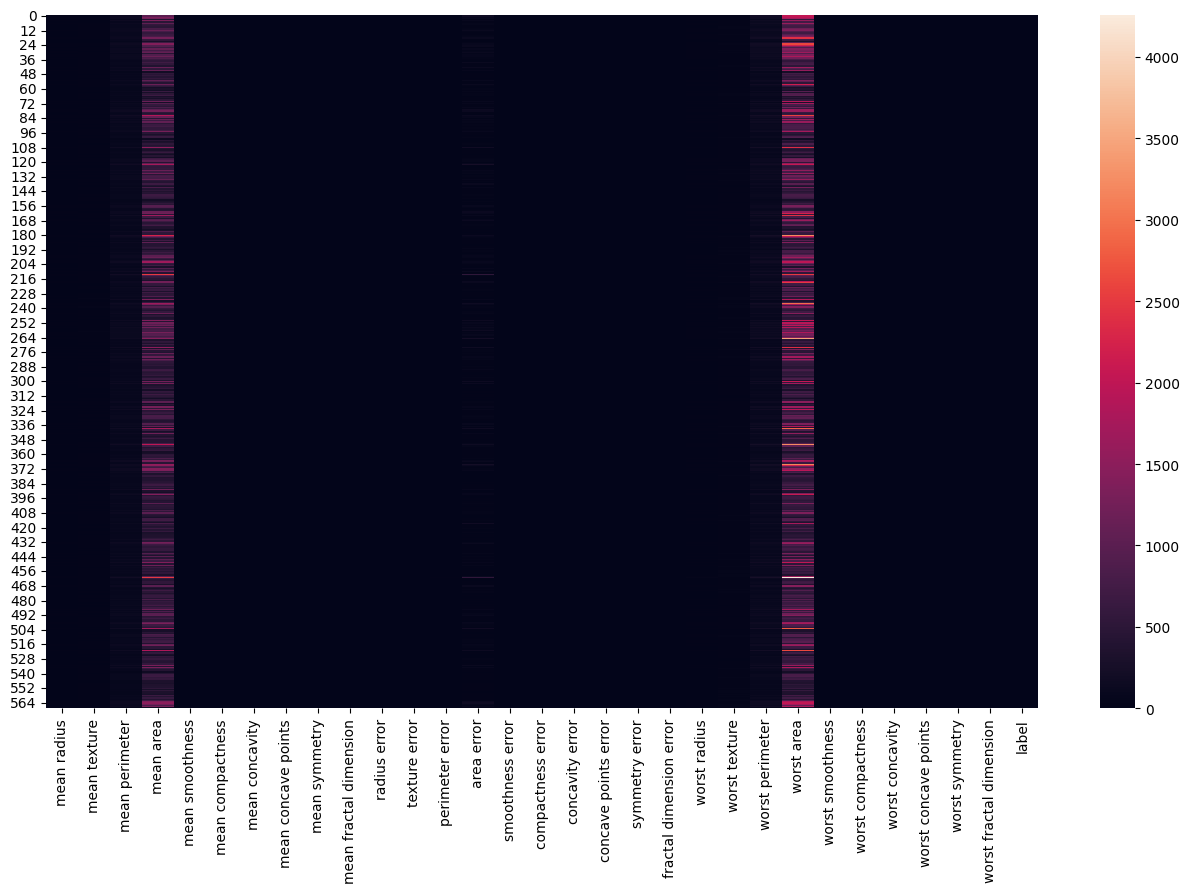

In [103]:
#heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(data_frame)

In [104]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Data Visualization

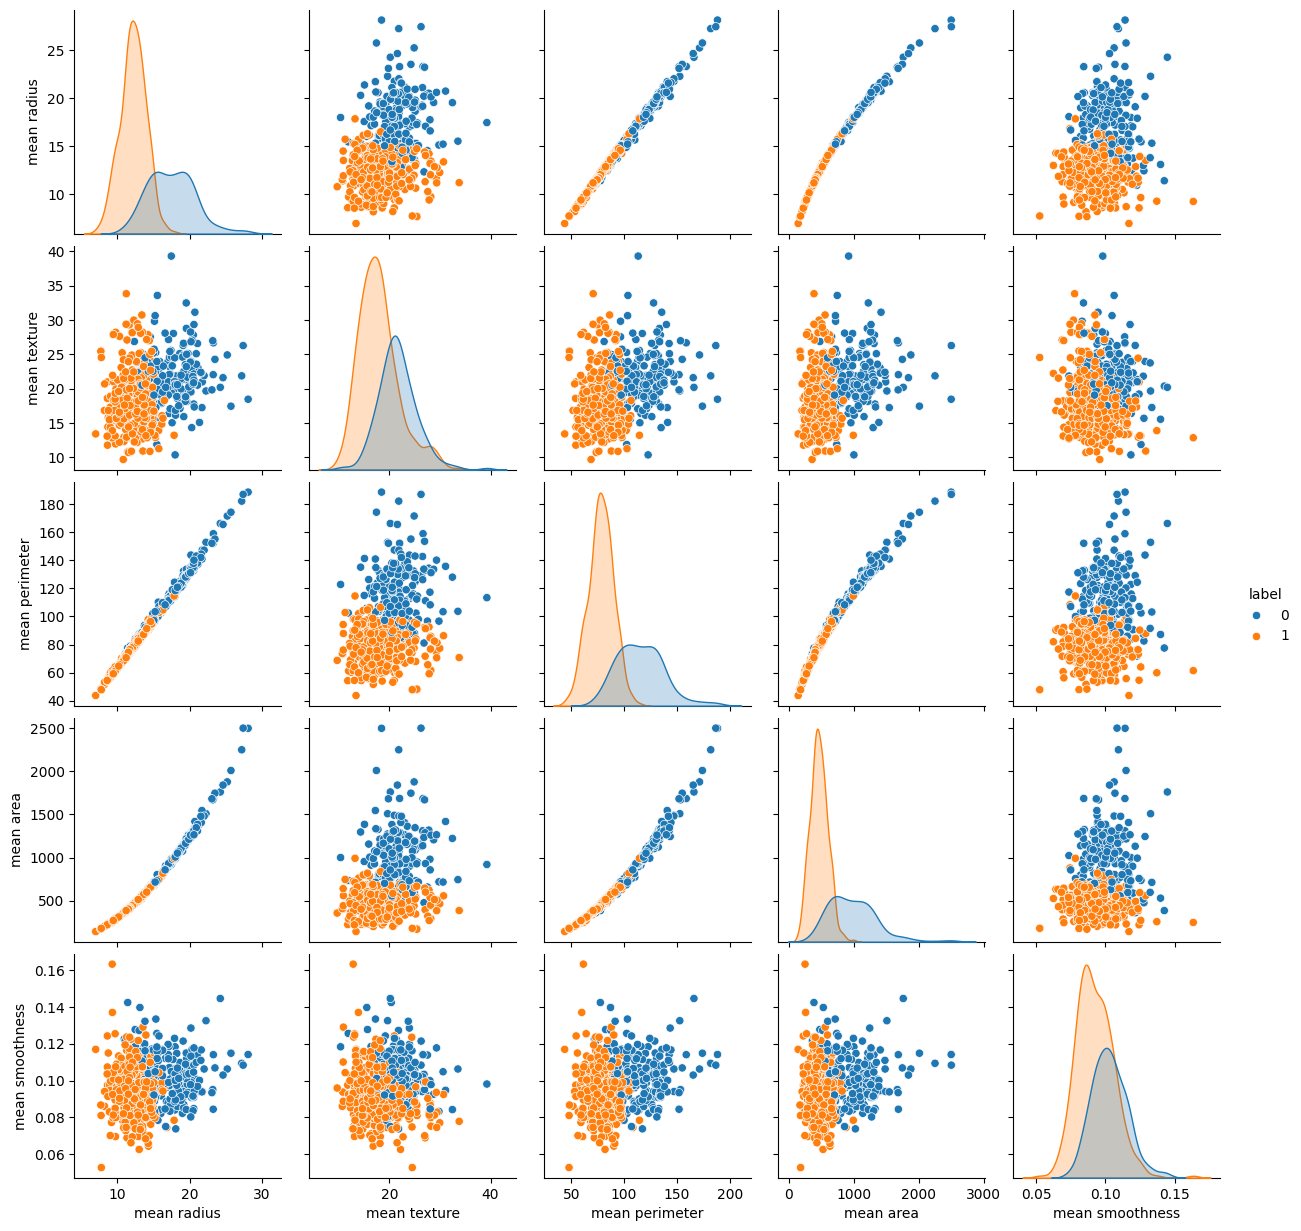

In [105]:
# pair plot of sample feature
sns.pairplot(data_frame, hue = 'label',
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

<Axes: >

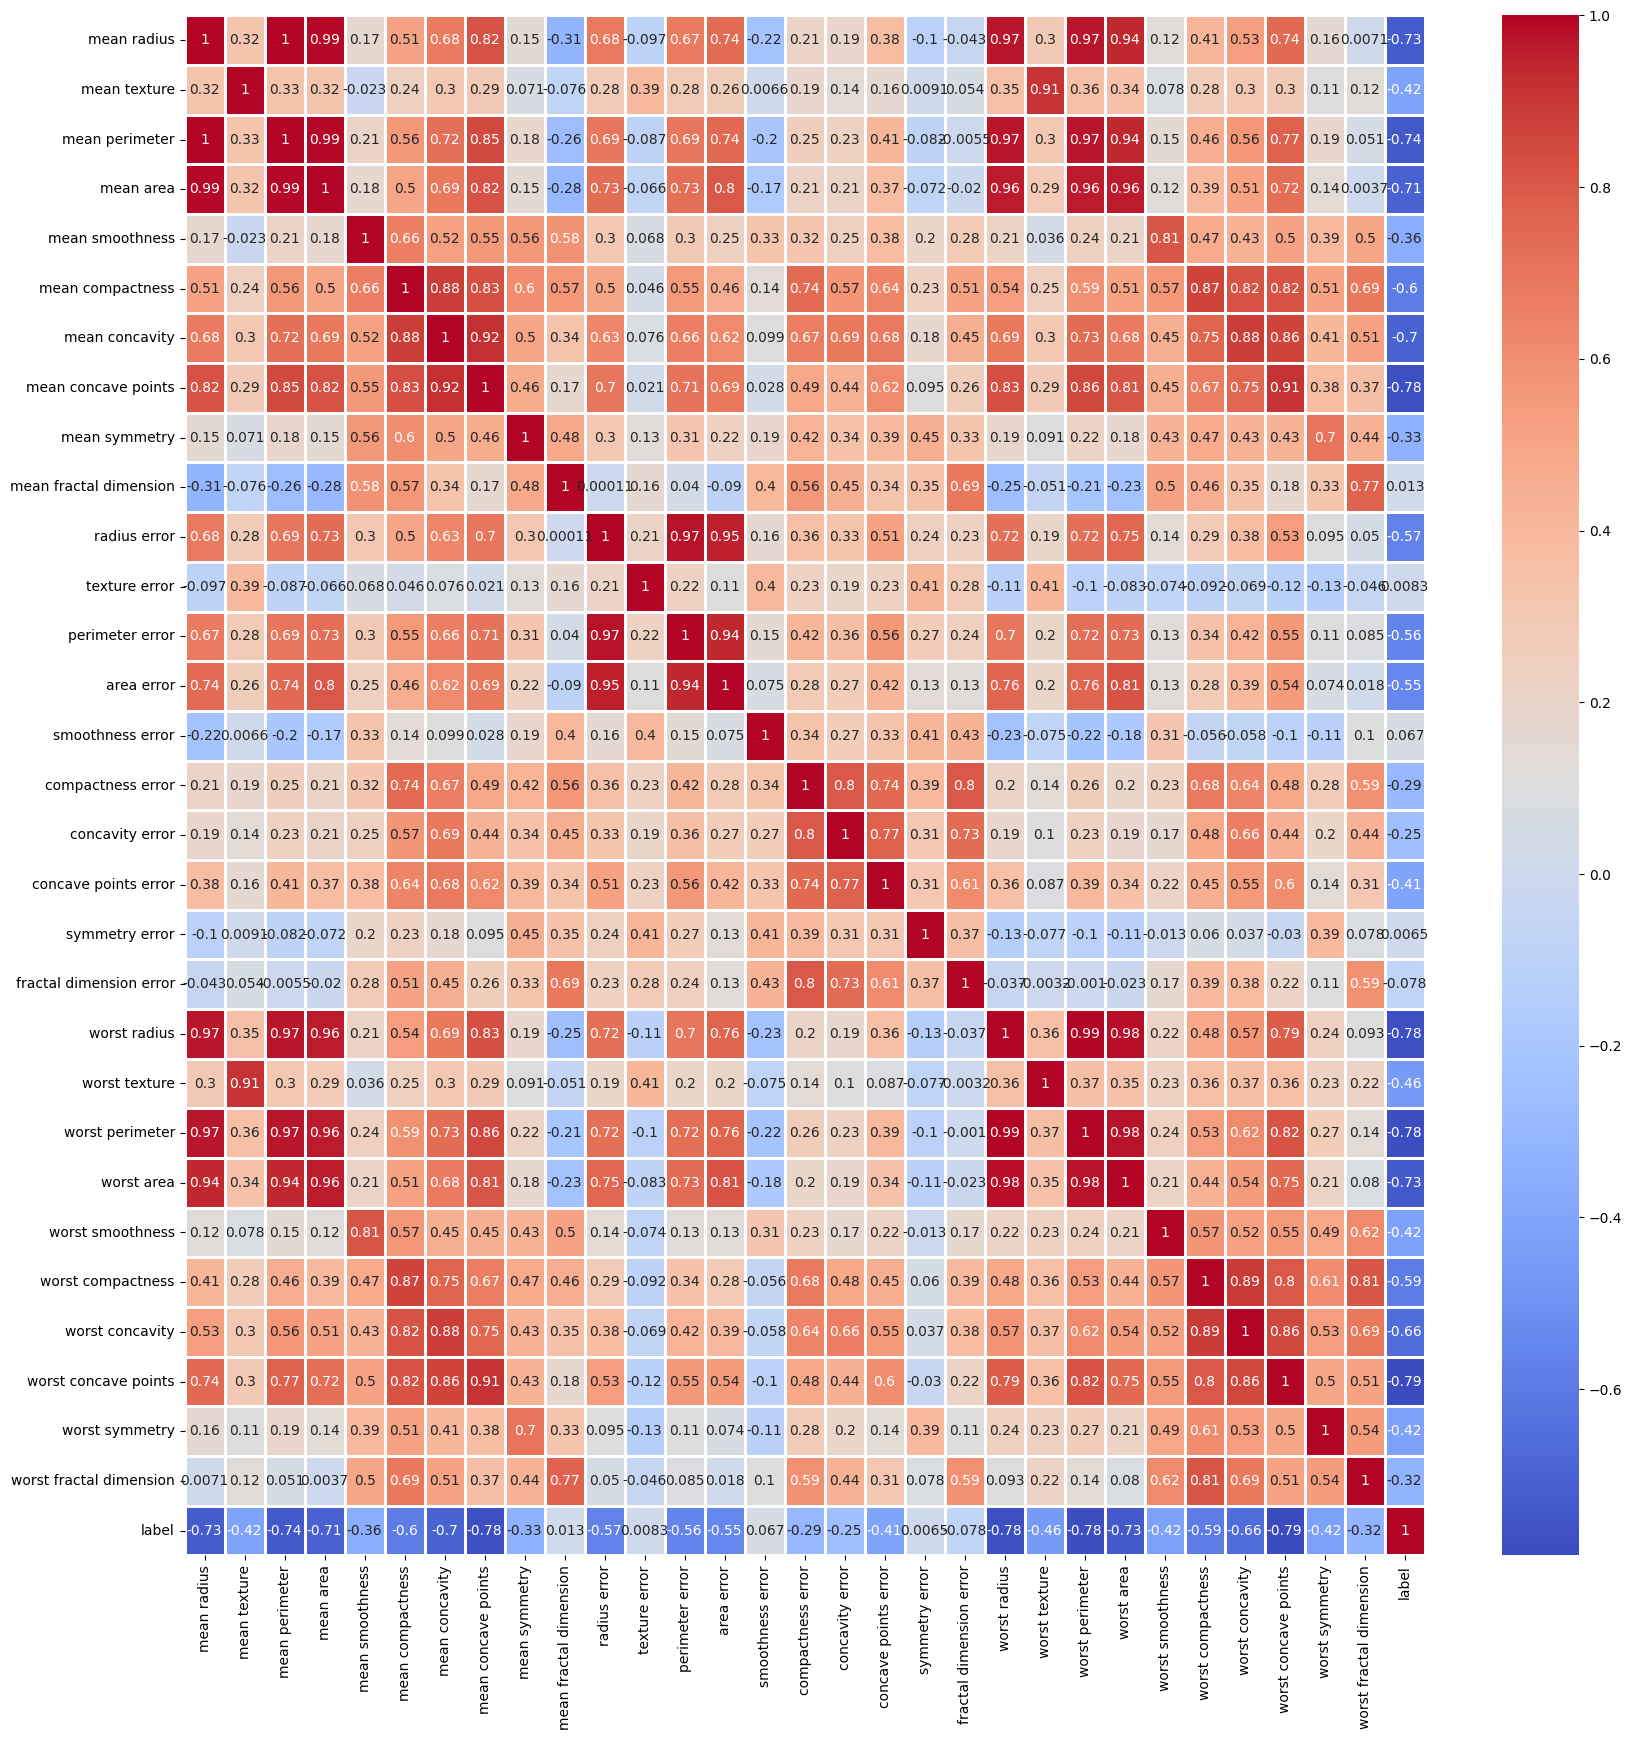

In [106]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(data_frame.corr(), annot = True, cmap ='coolwarm', linewidths=2)

Separating the features and target

In [108]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [109]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

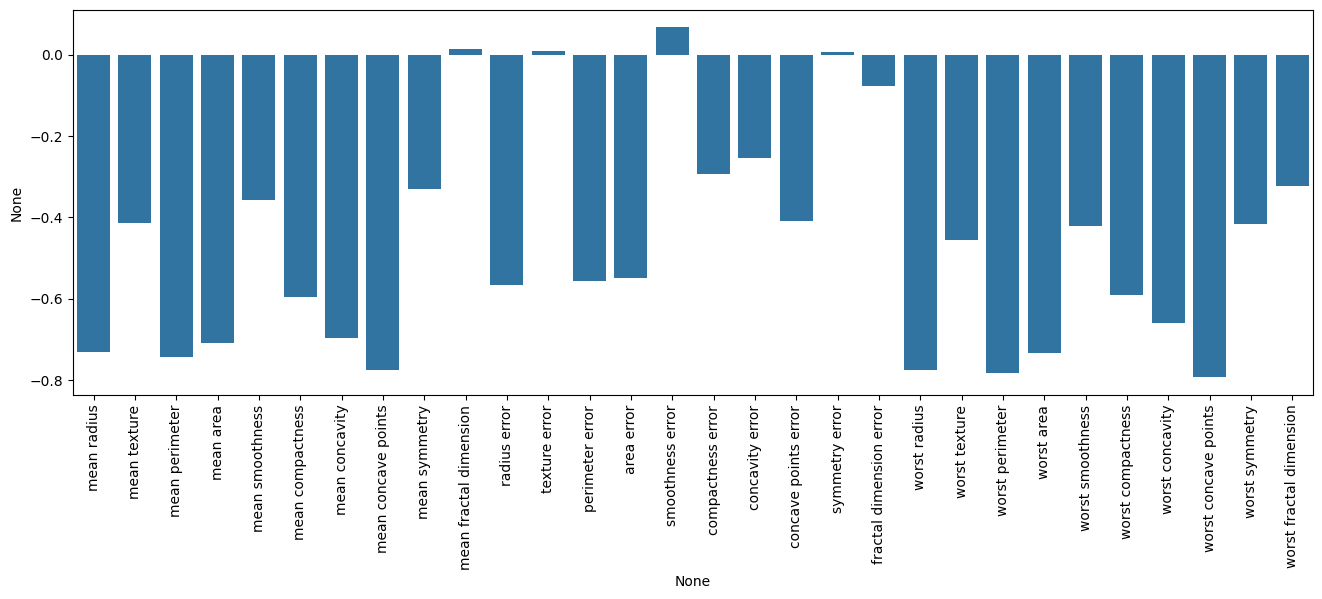

In [110]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(x=X.corrwith(Y).index,y=X.corrwith(Y))
ax.tick_params(axis='x',labelrotation = 90)
plt.show()

Splitting the data into training data & Testing data

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [112]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

Model Building

In [115]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Support Vector Classifier

In [116]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train_std, Y_train)
y_pred_scv = svc_classifier.predict(X_test_std)
accuracy_score(Y_test, y_pred_scv)

0.9649122807017544

K – Nearest Neighbor Classifier

In [117]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_knn)

0.9122807017543859

In [118]:
# Train KNN with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_std, Y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_std)
accuracy_score(Y_test, y_pred_knn_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6052631578947368

** Building the Neural Network**

In [119]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras.models import load_model

In [120]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [121]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 19ms/step - loss: 0.7749 - accuracy: 0.4914 - val_loss: 0.6377 - val_accuracy: 0.6739
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5595 - accuracy: 0.7188 - val_loss: 0.4919 - val_accuracy: 0.7609
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4378 - accuracy: 0.8166 - val_loss: 0.4079 - val_accuracy: 0.8261
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3631 - accuracy: 0.8533 - val_loss: 0.3481 - val_accuracy: 0.8478
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3085 - accuracy: 0.8973 - val_loss: 0.3012 - val_accuracy: 0.8696
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.9315 - val_loss: 0.2636 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2326 - accuracy: 0.9364 - val_loss: 0.2336 - val_accuracy: 0.9130
Epoch 8/10
13/13 [=

Visualizing accuracy and loss

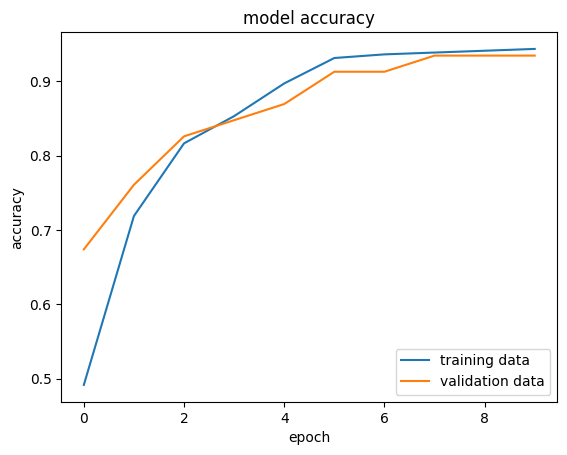

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

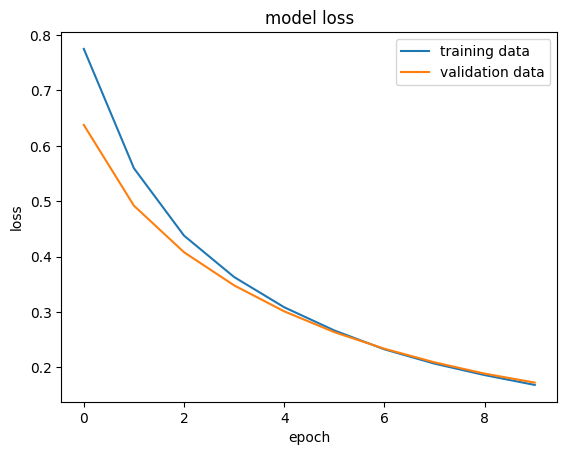

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [125]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.9737
0.9736841917037964


Decision Tree Classifier

In [126]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, Y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_dt)

0.9122807017543859

In [127]:
# Train with Standard scaled Data
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_std, Y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_std)
accuracy_score(Y_test, y_pred_dt_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6052631578947368

Random Forest

In [128]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_rf)

0.956140350877193

In [129]:
# Train with Standard scaled Data
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_std, Y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_std)
accuracy_score(Y_test, y_pred_rf_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8508771929824561

Adaboost Classifier

In [130]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier.fit(X_train, Y_train)
y_pred_adb = adb_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_adb)

0.9122807017543859

In [131]:
# Train with Standard scaled Data
adb_classifier2 = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier2.fit(X_train_std, Y_train)
y_pred_adb_sc = adb_classifier2.predict(X_test_std)
accuracy_score(Y_test, y_pred_adb_sc)

0.9122807017543859

XGBoost Classifier

In [132]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(Y_test, y_pred_xgb)

0.9385964912280702

In [133]:
# Train with Standard scaled Data
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_std, Y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_std)
accuracy_score(Y_test, y_pred_xgb_sc)

0.9385964912280702

XGBoost Parameter Tuning Randomized Search

In [134]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [135]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [136]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [137]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=-999, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgb_classifier_pt.fit(X_train, Y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)

In [139]:
accuracy_score(Y_test, y_pred_xgb_pt)

0.9385964912280702

In [140]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = X_train_std,y = Y_train, cv = 10)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

Cross validation accuracy of XGBoost model =  [1.         0.93478261 0.97826087 1.         1.         0.97777778
 1.         0.95555556 0.95555556 1.        ]

Cross validation mean accuracy of XGBoost model =  0.9801932367149758


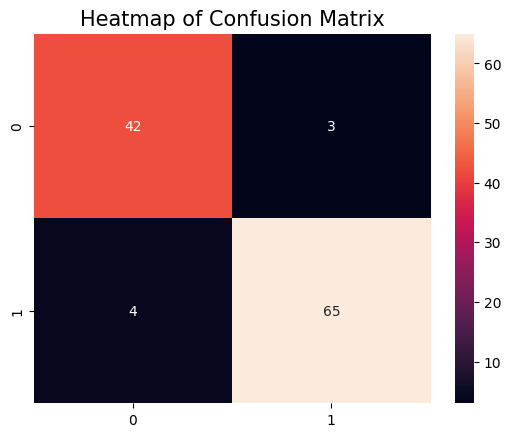

In [141]:
cm = confusion_matrix(Y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [142]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [143]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [144]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.2162504  0.79608935]


In [145]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [146]:
print(Y_pred)

[[0.2162504  0.79608935]
 [0.39801198 0.55066156]
 [0.06335901 0.95062435]
 [0.9777544  0.08615839]
 [0.5141513  0.5198413 ]
 [0.8484928  0.05183733]
 [0.3698103  0.63985604]
 [0.11439814 0.94142795]
 [0.20703104 0.865613  ]
 [0.17950524 0.9104983 ]
 [0.4849563  0.58426344]
 [0.16311087 0.7174263 ]
 [0.11514384 0.7336328 ]
 [0.26814482 0.6887616 ]
 [0.17317653 0.89743894]
 [0.8315355  0.29508474]
 [0.07396096 0.8295552 ]
 [0.13451746 0.91416764]
 [0.29875576 0.9435551 ]
 [0.7406459  0.08388476]
 [0.66992813 0.9966831 ]
 [0.07096462 0.7623054 ]
 [0.09358111 0.9112781 ]
 [0.08977116 0.91998035]
 [0.29055035 0.7117489 ]
 [0.766579   0.21313001]
 [0.18400969 0.6364619 ]
 [0.33730572 0.5647234 ]
 [0.90052044 0.51620835]
 [0.81892186 0.29063812]
 [0.23608613 0.8135941 ]
 [0.25065354 0.87357   ]
 [0.22142969 0.8863778 ]
 [0.98147994 0.14325045]
 [0.7983568  0.11188798]
 [0.19828036 0.5675345 ]
 [0.04797554 0.8973116 ]
 [0.22072133 0.76161987]
 [0.04375332 0.8133445 ]
 [0.17468418 0.69096726]


model.predict() gives the prediction probability of each class for that data point

In [147]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [148]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [149]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 27ms/step
[[0.08451011 0.7502737 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [150]:
import pickle

model.save('breast_cancer_detector_model.h5')

breast_model = load_model('breast_cancer_detector_model.h5')

input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = breast_model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
[[0.08451011 0.7502737 ]]
[1]
The tumor is Benign
